# Phase 2 - Week 1 - Day 3 AM - Computer Vision - CNN Example

In this notebook, we will classify fresh fruits and rotten fruits.

Source : [dataset](https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification)

# 1 - Import Libraries

In [ ]:
# Downgrade version of TensorFlow and tf-keras

!pip install -q --upgrade "tensorflow<2.16" "tf-keras<2.16"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.4 MB/s eta 0:00:00


In [ ]:
# Import Libraries

import glob
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Check TensorFlow version
print(tf.__version__)

2.15.1


# 2 - Data Loading

In [ ]:
%%time
# Download Dataset
# Source dataset : https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification

!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification
!unzip -qq /content/fruits-fresh-and-rotten-for-classification.zip

Dataset URL: https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification
License(s): unknown
100% 3.58G/3.58G [00:52<00:00, 193MB/s]
100% 3.58G/3.58G [00:52<00:00, 73.3MB/s]
CPU times: user 804 ms, sys: 123 ms, total: 927 ms
Wall time: 1min 48s


# 3 - Modeling

## 3.1 - Preprocessing

In [ ]:
# Define hyperparameters

train_path = '/content/dataset/train/'
test_path = '/content/dataset/test/'

img_height = 150
img_width = 150
batch_size = 126

In [ ]:
# Create batch generator for train-set, val-set, and test-set
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   validation_split=0.4)

train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(img_height,img_width),
																							class_mode='sparse',
																							subset='training',
																							batch_size=batch_size,
																							shuffle=True,
																							seed=10)

val_set = train_datagen.flow_from_directory(train_path,
                                            target_size=(img_height,img_width),
																						class_mode='sparse',
																						subset='validation',
																						batch_size=batch_size,
																						shuffle=True,
																						seed=10)

test_datagen = ImageDataGenerator(rescale=1./255.)
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(img_height,img_width),
                                            class_mode='sparse',
																						batch_size=batch_size,
																						shuffle=False,
																						seed=10)

Found 6543 images belonging to 6 classes.
Found 4358 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [ ]:
# Show labels

print(train_set.class_indices)
print(test_set.class_indices)

{'freshapples': 0, 'freshbanana': 1, 'freshoranges': 2, 'rottenapples': 3, 'rottenbanana': 4, 'rottenoranges': 5}
{'freshapples': 0, 'freshbanana': 1, 'freshoranges': 2, 'rottenapples': 3, 'rottenbanana': 4, 'rottenoranges': 5}


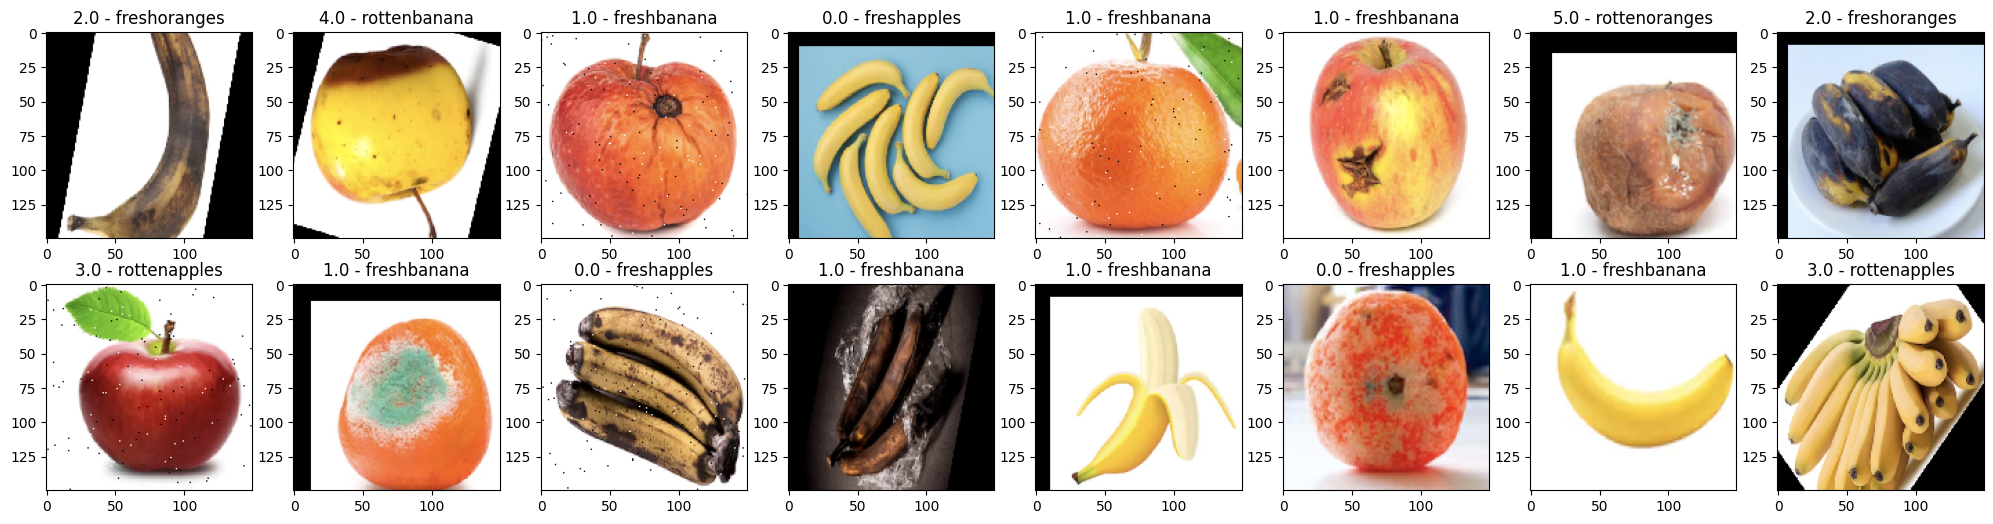

In [ ]:
# Show several images of train-set

fig,ax = plt.subplots(nrows=2, ncols=8, figsize=(25,6))
n = 0
idx = np.random.randint(len(train_set.next()[0]), size=16)
for i in range(2):
  for j in range(8):
    img = train_set.next()[0][idx[n]]
    ax[i][j].imshow(img)
    class_index = train_set.next()[1][idx[n]]
    class_name = dict(map(reversed, train_set.class_indices.items())) [class_index]
    ax[i][j].set_title(str(class_index) + ' - ' +  str(class_name))
    n+=1

## 3.2 - Model Definition

In [ ]:
# Clear session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Create Sequential API model

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(128, (3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(6, activation='softmax'))

# Compile
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

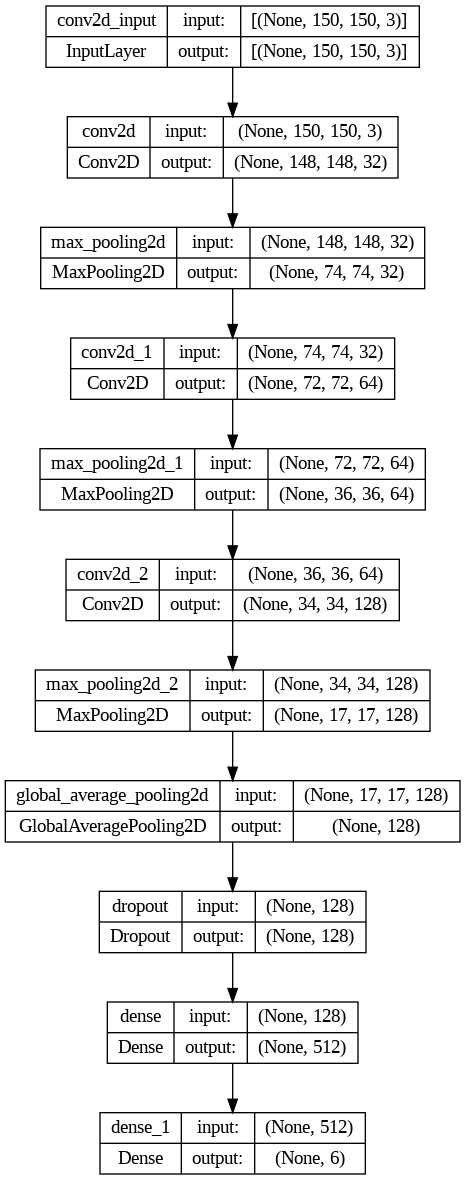

In [ ]:
# Plot layers

tf.keras.utils.plot_model(model, show_shapes=True)

## 3.3 - Model Training

Because the dataset is large, it is certain that the training process will take a long time. For this notebook, two hyperparameters namely `steps_per_epoch` and `validation_steps` will be used so that the training process can be completed quickly.

[From TensorFlow documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit)
```
steps_per_epoch : Integer or None. Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch.

validation_steps : Only relevant if validation_data is provided. Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
```

<br>

**IMPORTANT NOTES**
1. It should be noted that the use of `steps_per_epoch` and `validation_steps` will limit the amount of data used so that not all data will be used.
2. This will result in a lack of performance, but the training process can be completed faster.

In [ ]:
# Train the model

%%time
epoch = 25
history = model.fit(train_set, epochs=epoch, steps_per_epoch=20, validation_data=val_set, verbose=1, validation_steps=10)

Epoch 1/25
20/20 [==============================] - 31s 1s/step - loss: 1.7502 - accuracy: 0.2409 - val_loss: 1.6570 - val_accuracy: 0.3587
Epoch 2/25
20/20 [==============================] - 17s 880ms/step - loss: 1.5245 - accuracy: 0.3937 - val_loss: 1.3231 - val_accuracy: 0.4325
Epoch 3/25
20/20 [==============================] - 22s 1s/step - loss: 1.2548 - accuracy: 0.5173 - val_loss: 0.9736 - val_accuracy: 0.6810
Epoch 4/25
20/20 [==============================] - 21s 1s/step - loss: 1.0833 - accuracy: 0.5937 - val_loss: 0.8555 - val_accuracy: 0.6770
Epoch 5/25
20/20 [==============================] - 21s 1s/step - loss: 0.9618 - accuracy: 0.6308 - val_loss: 0.7785 - val_accuracy: 0.7278
Epoch 6/25
20/20 [==============================] - 18s 912ms/step - loss: 0.8973 - accuracy: 0.6690 - val_loss: 0.7843 - val_accuracy: 0.7341
Epoch 7/25
20/20 [==============================] - 21s 1s/step - loss: 0.8087 - accuracy: 0.7167 - val_loss: 0.6530 - val_accuracy: 0.7730
Epoch 8/25
20/

## 3.4 - Model Evaluation

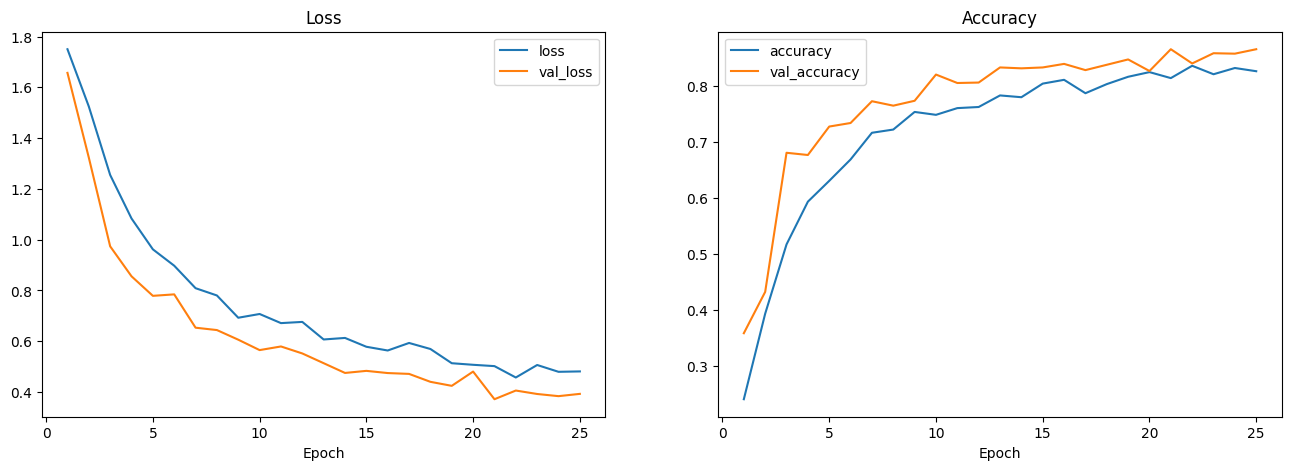

In [ ]:
# Plot training results

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1, epoch+1), history.history['loss'], label='loss')
ax[0].plot(range(1, epoch+1), history.history['val_loss'], label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1, epoch+1), history.history['accuracy'], label='accuracy')
ax[1].plot(range(1, epoch+1), history.history['val_accuracy'], label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.5)

plt.show()

## 3.5 - Model Inference

In [ ]:
# Create a function for test a new image

def prediction(file):
  img = tf.keras.utils.load_img(file, target_size=(img_height,img_width))
  x = tf.keras.utils.img_to_array(img)/255

  plt.imshow(img)

  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  y_pred_proba = model.predict(images)
  y_pred_class = np.argmax(y_pred_proba[0])

  class_name = list(train_set.class_indices.keys())
  y_pred_class_name = class_name[y_pred_class]

  print('Prediction : {}'.format(y_pred_class_name))

--2024-10-29 03:06:10--  https://i0.wp.com/writemakesmight.net/wp-content/uploads/2020/05/rotten-apple-13258722.jpg
Resolving i0.wp.com (i0.wp.com)... 192.0.77.2
Connecting to i0.wp.com (i0.wp.com)|192.0.77.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94157 (92K) [image/jpeg]
Saving to: ‘image_inference_1.jpg’

image_inference_1.j 100%[===================>]  91.95K  --.-KB/s    in 0.02s   

2024-10-29 03:06:10 (5.66 MB/s) - ‘image_inference_1.jpg’ saved [94157/94157]

1/1 [==============================] - 0s 439ms/step
Prediction : rottenapples


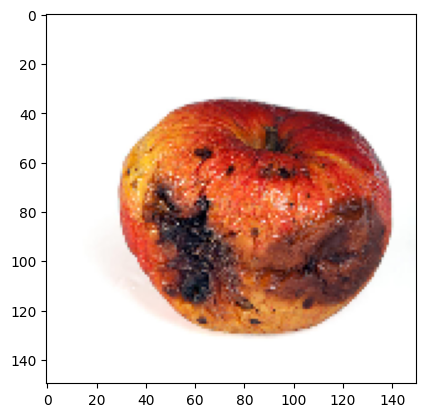

In [ ]:
# Test a new image 1

## Download a new image
!wget https://i0.wp.com/writemakesmight.net/wp-content/uploads/2020/05/rotten-apple-13258722.jpg -O image_inference_1.jpg

## Inferencing
prediction('image_inference_1.jpg')

--2024-10-29 03:06:11--  https://nurserylive.com/cdn/shop/products/nurserylive-plants-banana-g9-kela-plant-202932.jpg
Resolving nurserylive.com (nurserylive.com)... 23.227.38.65
Connecting to nurserylive.com (nurserylive.com)|23.227.38.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95122 (93K) [image/jpeg]
Saving to: ‘image_inference_2.jpg’

image_inference_2.j 100%[===================>]  92.89K  --.-KB/s    in 0.01s   

2024-10-29 03:06:12 (6.32 MB/s) - ‘image_inference_2.jpg’ saved [95122/95122]

1/1 [==============================] - 0s 17ms/step
Prediction : rottenapples


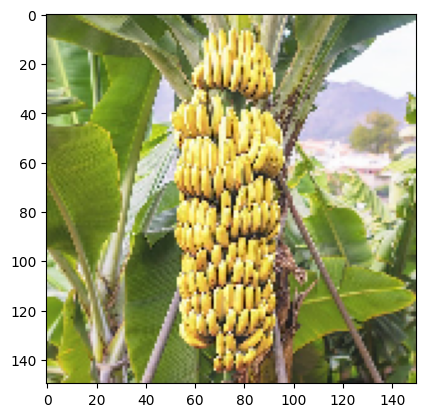

In [ ]:
# Test a new image 2

## Download a new image
!wget https://nurserylive.com/cdn/shop/products/nurserylive-plants-banana-g9-kela-plant-202932.jpg -O image_inference_2.jpg

## Inferencing
prediction('image_inference_2.jpg')

--2024-10-29 03:06:12--  https://media-cldnry.s-nbcnews.com/image/upload/newscms/2020_19/1565781/food-preservation-tips-today-main-200504.jpg
Resolving media-cldnry.s-nbcnews.com (media-cldnry.s-nbcnews.com)... 184.85.231.114, 2600:1406:5e00:28f::a1d, 2600:1406:5e00:294::a1d
Connecting to media-cldnry.s-nbcnews.com (media-cldnry.s-nbcnews.com)|184.85.231.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82317 (80K) [image/jpeg]
Saving to: ‘image_inference_3.jpg’

image_inference_3.j 100%[===================>]  80.39K  --.-KB/s    in 0.01s   

2024-10-29 03:06:12 (5.44 MB/s) - ‘image_inference_3.jpg’ saved [82317/82317]

1/1 [==============================] - 0s 17ms/step
Prediction : rottenbanana


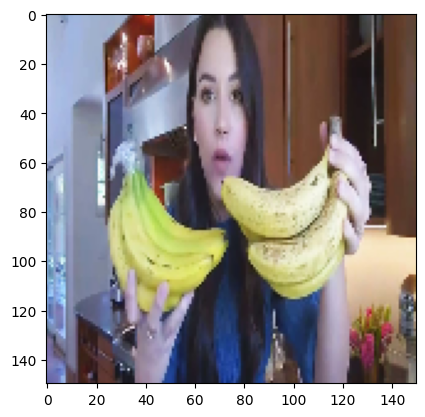

In [ ]:
# Test a new image 3

## Download a new image
!wget https://media-cldnry.s-nbcnews.com/image/upload/newscms/2020_19/1565781/food-preservation-tips-today-main-200504.jpg -O image_inference_3.jpg

## Inferencing
prediction('image_inference_3.jpg')